#Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import itertools

#Load Dataset

In [ ]:
#Importing the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Assign column names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

#Data Exploration

## Basic information

In [ ]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dataset.describe().round(2)

,sepal-length,sepal-width,petal-length,petal-width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
print("Sepal Length")
print(dataset['sepal-length'].describe().round(2))
print("Median sepal-length: ", dataset['sepal-length'].median())

Sepal Length
count    150.00
mean       5.84
std        0.83
min        4.30
25%        5.10
50%        5.80
75%        6.40
max        7.90
Name: sepal-length, dtype: float64
Median sepal-length:  5.8


In [ ]:
print("Sepal Width")
print(dataset['sepal-width'].describe().round(2))
print("Median sepal-width: ", dataset['sepal-width'].median())

Sepal Width
count    150.00
mean       3.05
std        0.43
min        2.00
25%        2.80
50%        3.00
75%        3.30
max        4.40
Name: sepal-width, dtype: float64
Median sepal-width:  3.0


In [ ]:
print("Petal Length")
print(dataset['petal-length'].describe().round(2))
print("Median petal-length: ", dataset['petal-length'].median())

Petal Length
count    150.00
mean       3.76
std        1.76
min        1.00
25%        1.60
50%        4.35
75%        5.10
max        6.90
Name: petal-length, dtype: float64
Median petal-length:  4.35


In [ ]:
print("Petal Width")
print(dataset['petal-width'].describe().round(2))
print("Median petal-width: ", dataset['petal-width'].median())

Petal Width
count    150.00
mean       1.20
std        0.76
min        0.10
25%        0.30
50%        1.30
75%        1.80
max        2.50
Name: petal-width, dtype: float64
Median petal-width:  1.3


In [ ]:
print("Class")
print(dataset['Class'].describe())

Class
count             150
unique              3
top       Iris-setosa
freq               50
Name: Class, dtype: object


## Data Visualization

array([[<Axes: title={'center': 'sepal-length'}>,
        <Axes: title={'center': 'sepal-width'}>],
       [<Axes: title={'center': 'petal-length'}>,
        <Axes: title={'center': 'petal-width'}>]], dtype=object)

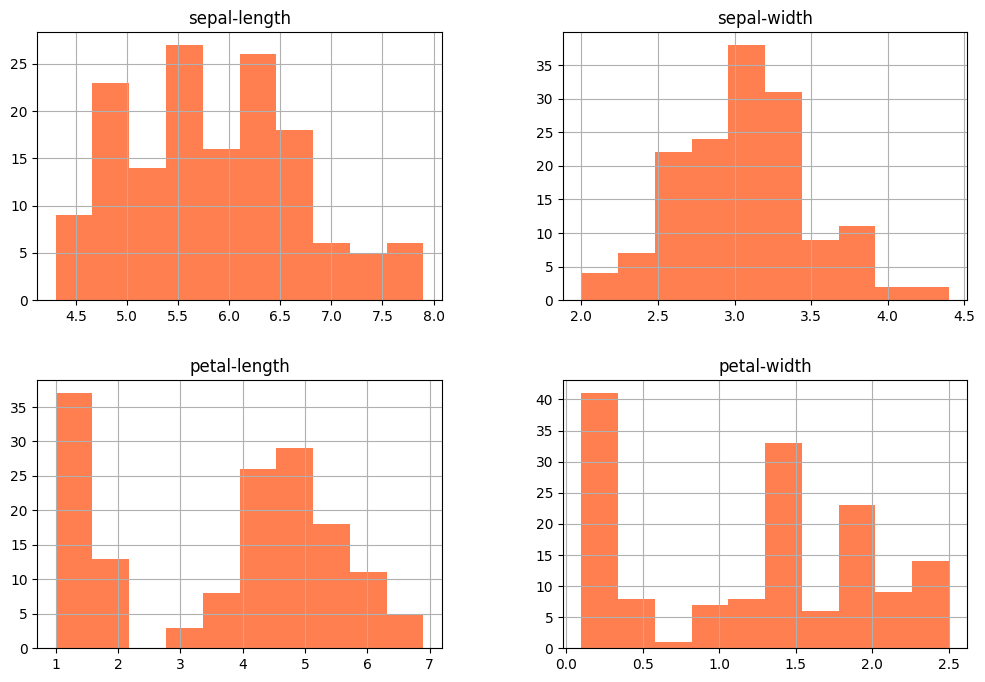

In [ ]:
numerical_attributes = dataset.select_dtypes(include=['float'])
numerical_attributes.hist(figsize=(12,8), color = 'coral')

In [ ]:
def add_label(ax):
  for label in ax.containers:
    ax.bar_label(label)

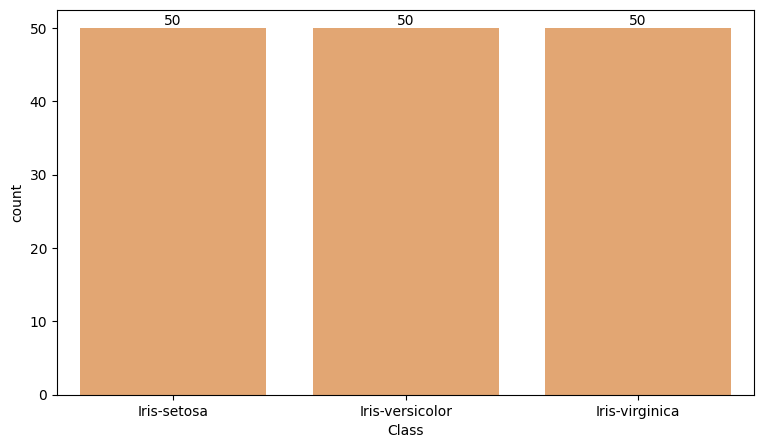

In [ ]:
data_class = dataset.select_dtypes(include=['object'])
plt.figure(figsize=(9,5))
dc = sns.countplot(data = data_class, x = "Class", color = 'sandybrown')
add_label(dc)
plt.show()

<Axes: xlabel='Class', ylabel='sepal-length'>

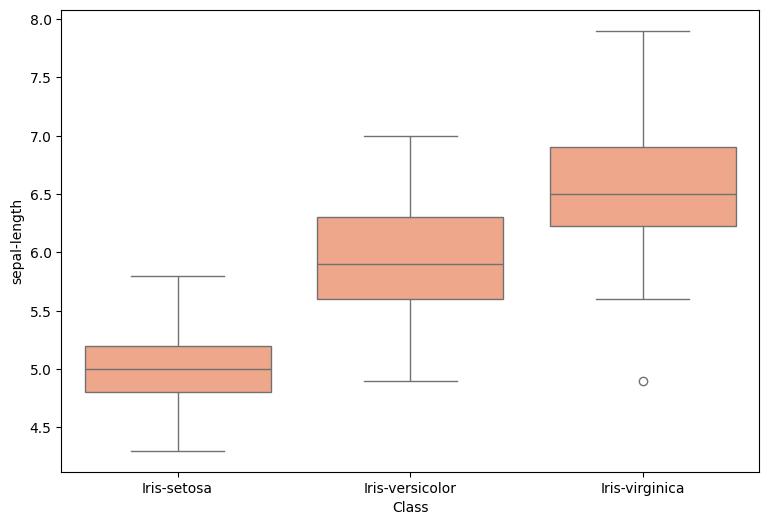

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(x="Class",y="sepal-length", color = "lightsalmon", data=dataset)

<Axes: xlabel='Class', ylabel='sepal-width'>

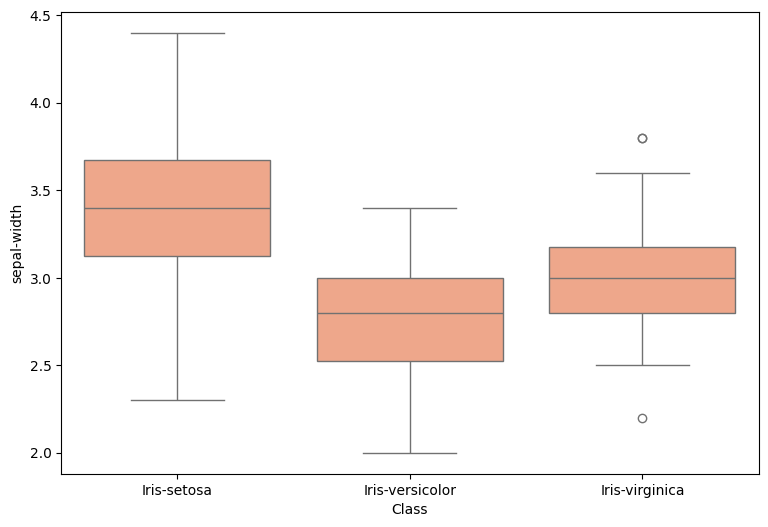

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(x="Class",y="sepal-width", color = "lightsalmon", data=dataset)

<Axes: xlabel='Class', ylabel='petal-length'>

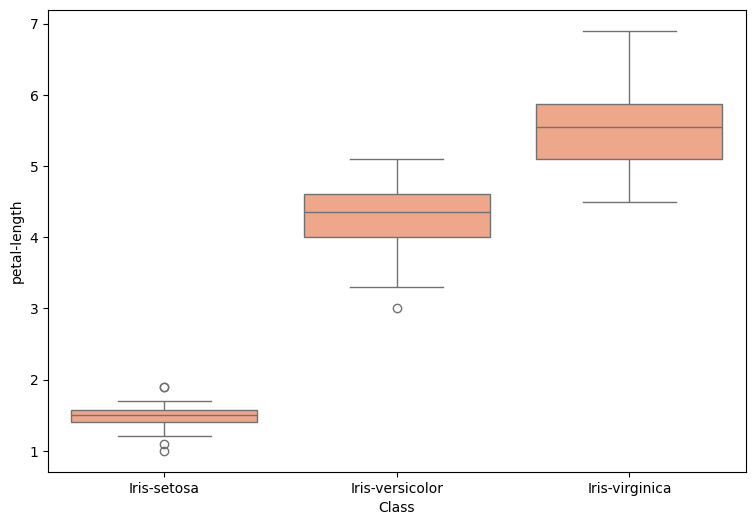

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(x="Class",y="petal-length", color = "lightsalmon", data=dataset)

<Axes: xlabel='Class', ylabel='petal-width'>

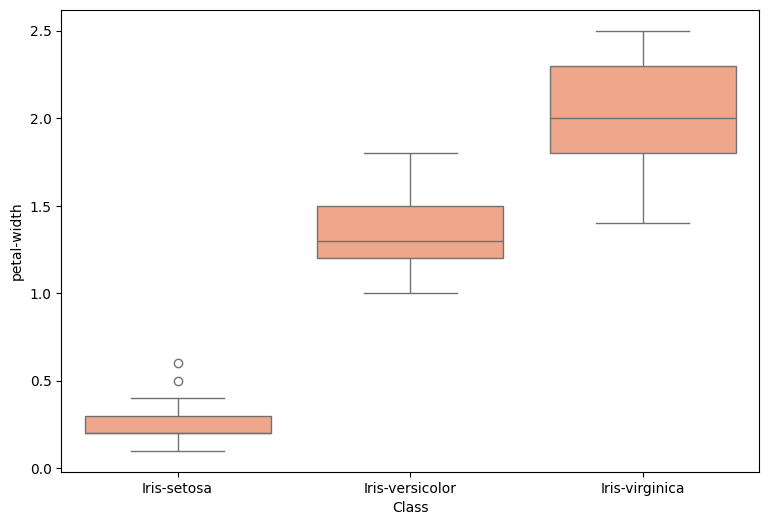

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(x="Class",y="petal-width", color = "lightsalmon", data=dataset)

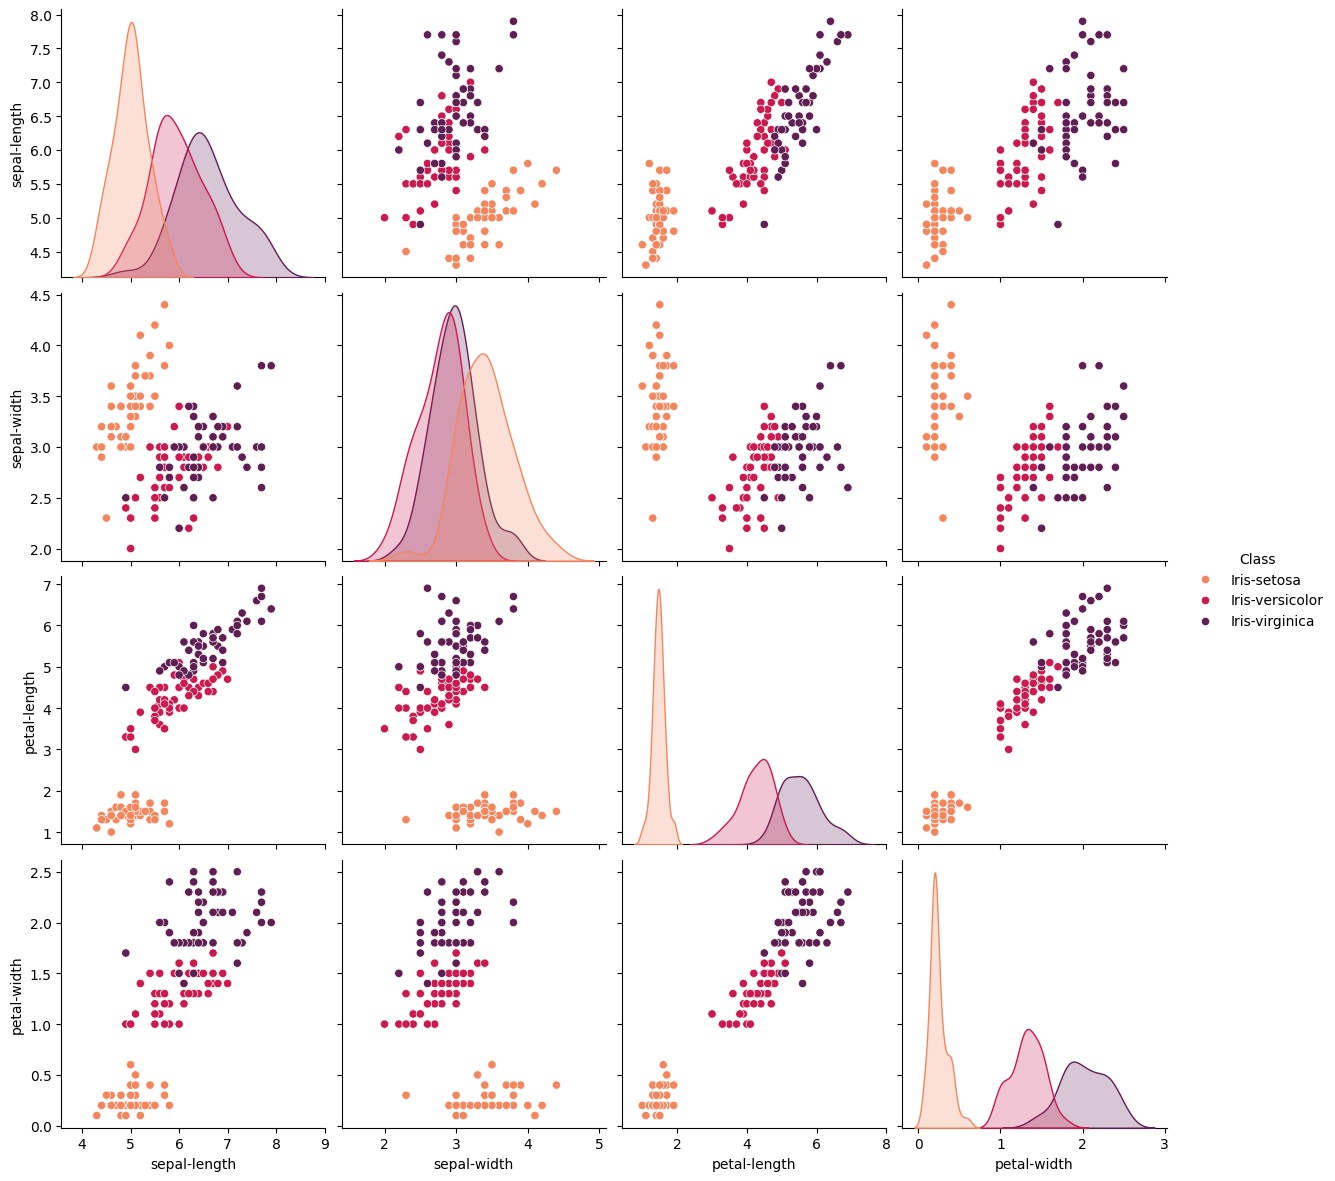

In [ ]:
sns.pairplot(dataset, height=3, diag_kind = 'kde', hue='Class', palette="rocket_r")

Text(0.5, 1.05, 'Data Correlation of Features')

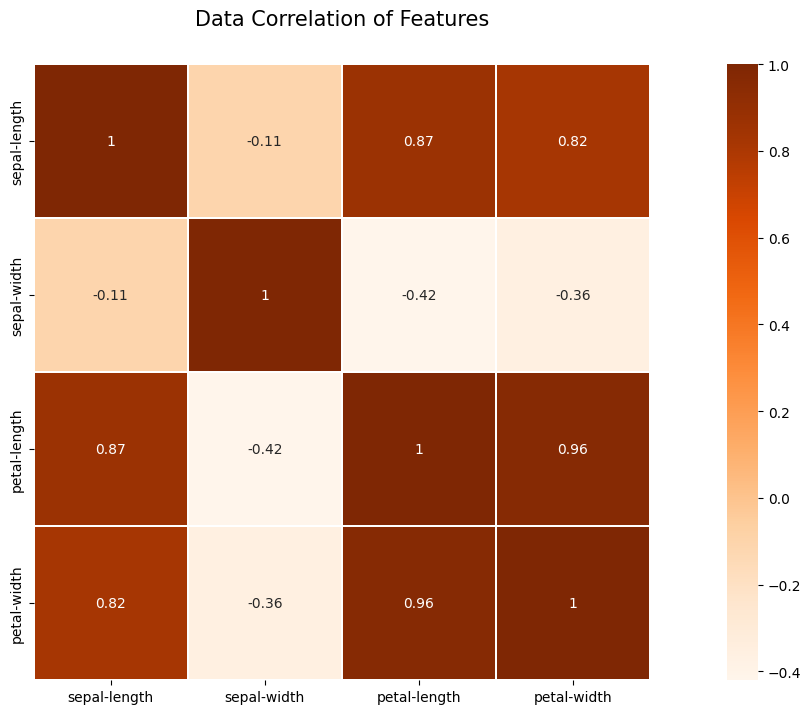

In [ ]:
corr = numerical_attributes.corr()
f, ax = plt.subplots(figsize=(20, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, cmap="Oranges", square=True, ax = ax, annot=True, linewidth = 0.1)
plt.title('Data Correlation of Features', y=1.05, size=15)

#Split Data

In [ ]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

##Original Training Data

In [ ]:
traindata_original = pd.DataFrame(x_train, columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width'])
traindata_original.describe().round(2)

,sepal-length,sepal-width,petal-length,petal-width
count,120.00,120.00,120.00,120.00
mean,5.84,3.04,3.75,1.19
std,0.83,0.44,1.77,0.76
min,4.40,2.00,1.00,0.10
25%,5.10,2.80,1.58,0.30
50%,5.80,3.00,4.25,1.30
75%,6.40,3.32,5.10,1.80
max,7.70,4.40,6.90,2.50


array([[<Axes: title={'center': 'sepal-length'}>,
        <Axes: title={'center': 'sepal-width'}>],
       [<Axes: title={'center': 'petal-length'}>,
        <Axes: title={'center': 'petal-width'}>]], dtype=object)

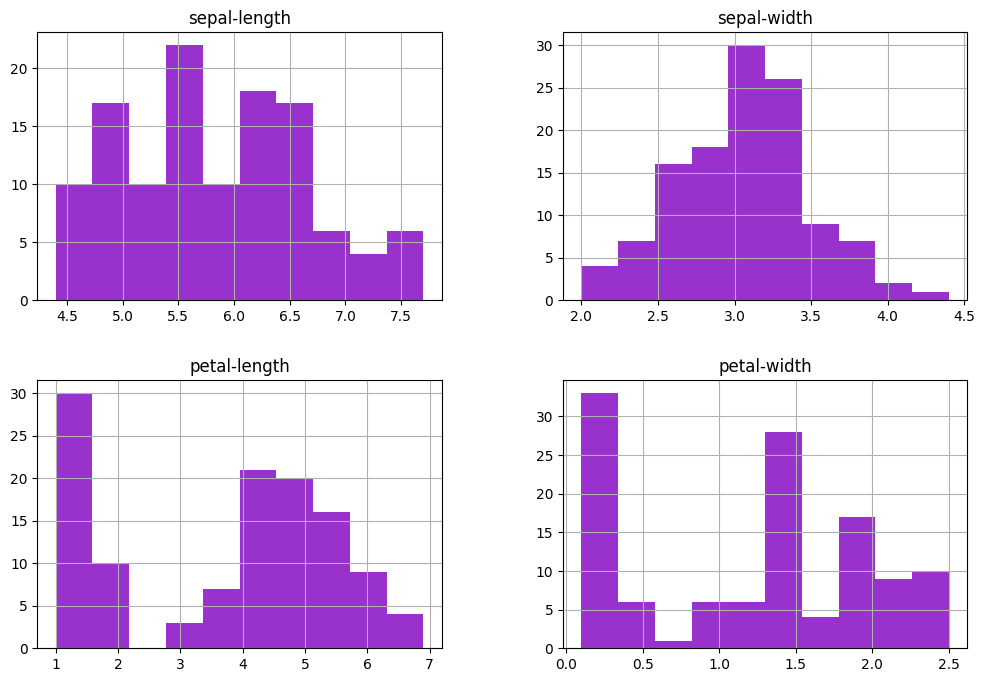

In [ ]:
numerical_attributes = traindata_original.select_dtypes(include=['float'])
numerical_attributes.hist(figsize=(12,8), color = 'darkorchid')

##Original Testing Data

In [ ]:
testdata_original = pd.DataFrame(x_test, columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width'])
testdata_original.describe().round(2)

,sepal-length,sepal-width,petal-length,petal-width
count,30.00,30.00,30.00,30.00
mean,5.85,3.11,3.81,1.22
std,0.82,0.40,1.77,0.80
min,4.30,2.60,1.10,0.10
25%,5.12,2.80,1.62,0.25
50%,5.80,3.00,4.45,1.40
75%,6.40,3.20,5.10,1.88
max,7.90,4.20,6.40,2.40


array([[<Axes: title={'center': 'sepal-length'}>,
        <Axes: title={'center': 'sepal-width'}>],
       [<Axes: title={'center': 'petal-length'}>,
        <Axes: title={'center': 'petal-width'}>]], dtype=object)

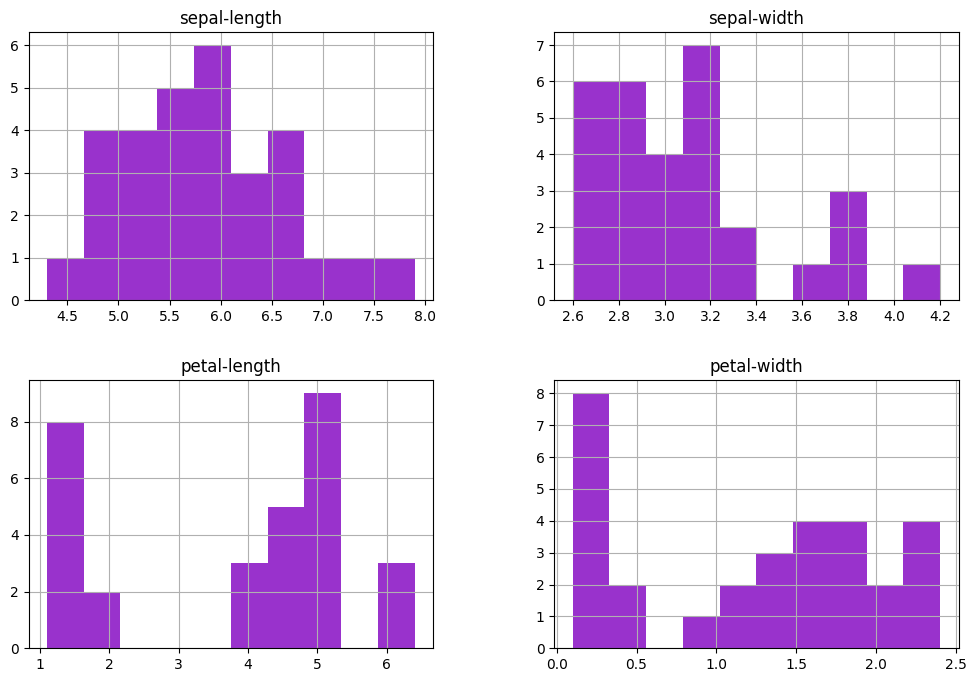

In [ ]:
numerical_attributes = testdata_original.select_dtypes(include=['float'])
numerical_attributes.hist(figsize=(12,8), color = 'darkorchid')

#Using Standard Scaler

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

##Normalized Training Data

In [ ]:
traindata_norm = pd.DataFrame(x_train, columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width'])
traindata_norm.describe().round(2)

,sepal-length,sepal-width,petal-length,petal-width
count,120.00,120.00,120.00,120.00
mean,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00
min,-1.74,-2.37,-1.56,-1.45
25%,-0.90,-0.55,-1.23,-1.19
50%,-0.05,-0.09,0.29,0.14
75%,0.67,0.65,0.77,0.81
max,2.24,3.09,1.79,1.73


array([[<Axes: title={'center': 'sepal-length'}>,
        <Axes: title={'center': 'sepal-width'}>],
       [<Axes: title={'center': 'petal-length'}>,
        <Axes: title={'center': 'petal-width'}>]], dtype=object)

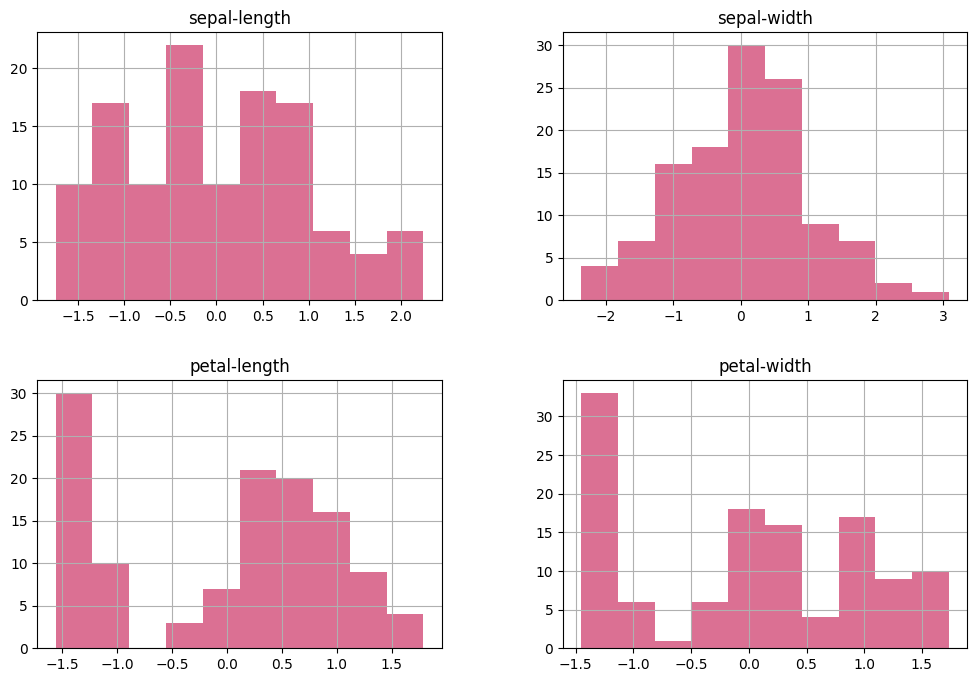

In [ ]:
numerical_attributes = traindata_norm.select_dtypes(include=['float'])
numerical_attributes.hist(figsize=(12,8), color = 'PaleVioletRed')

##Normalized Testing Data

In [ ]:
testdata_norm = pd.DataFrame(x_test, columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width'])
testdata_norm.describe().round(2)

,sepal-length,sepal-width,petal-length,petal-width
count,30.00,30.00,30.00,30.00
mean,0.01,0.15,0.03,0.04
std,0.99,0.91,1.00,1.07
min,-1.86,-1.00,-1.50,-1.45
25%,-0.87,-0.55,-1.20,-1.25
50%,-0.05,-0.09,0.40,0.27
75%,0.67,0.36,0.77,0.90
max,2.48,2.63,1.51,1.60


array([[<Axes: title={'center': 'sepal-length'}>,
        <Axes: title={'center': 'sepal-width'}>],
       [<Axes: title={'center': 'petal-length'}>,
        <Axes: title={'center': 'petal-width'}>]], dtype=object)

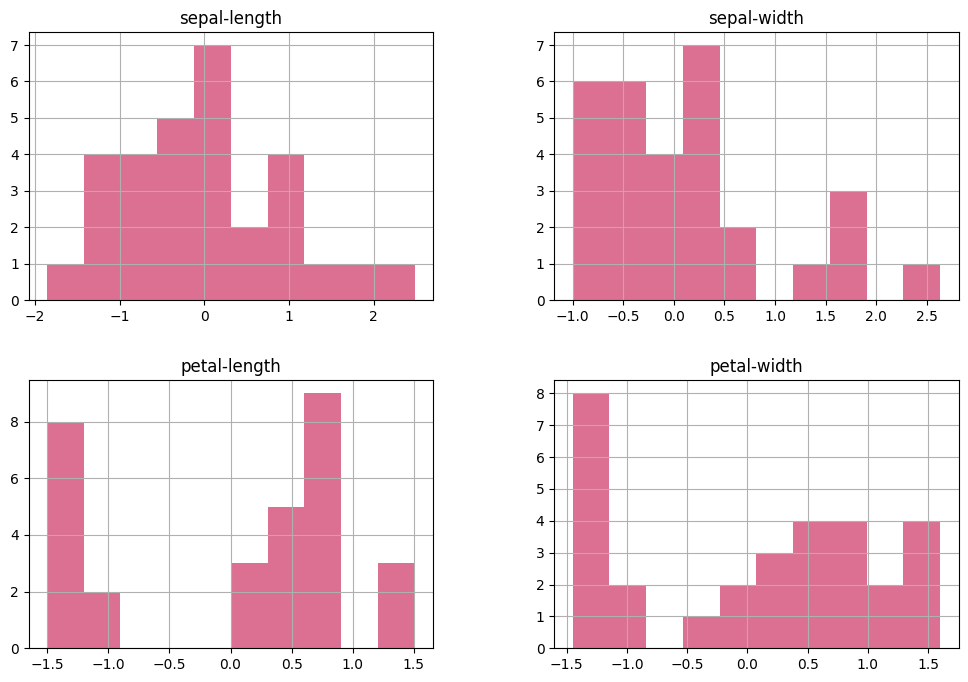

In [ ]:
numerical_attributes = testdata_norm.select_dtypes(include=['float'])
numerical_attributes.hist(figsize=(12,8), color = 'PaleVioletRed')

# KNN

##1st Round

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
y_pred.shape

(30,)

###Confusion Matrix

In [ ]:
#Evaluating the algorithm
print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]


Confusion matrix, without normalization


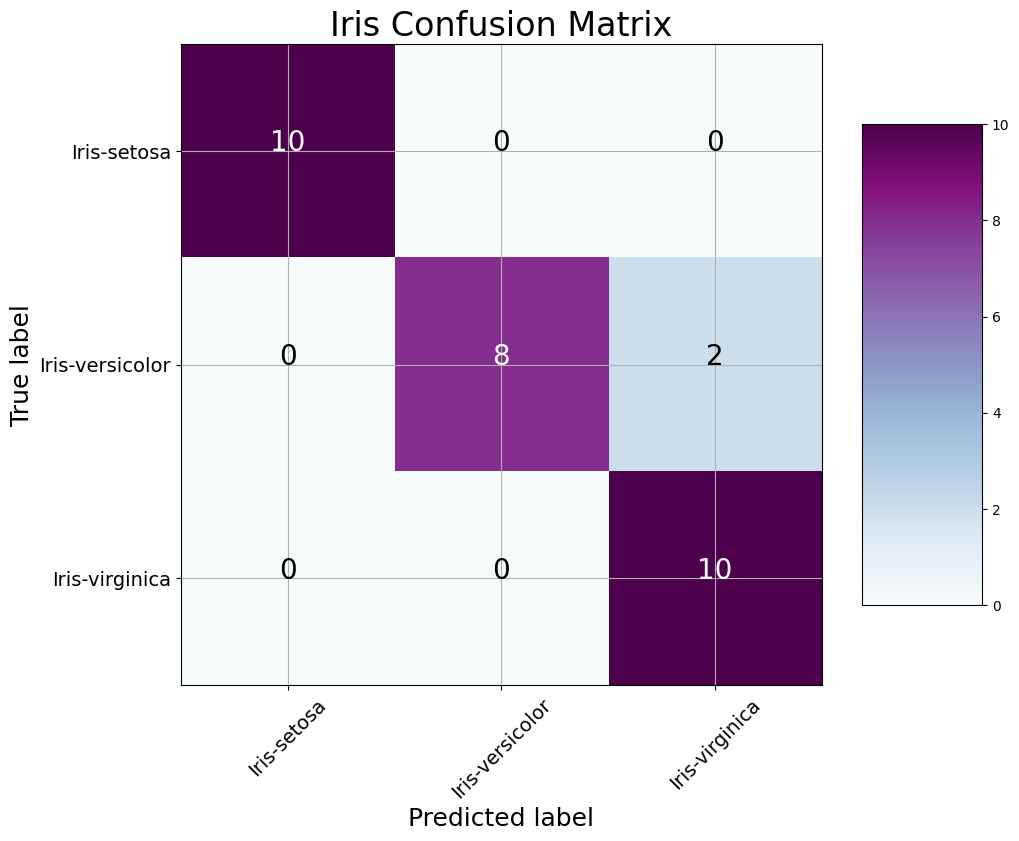

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Oranges):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        #print(cm)
        # Plot the confusion matrix
        plt.figure(figsize = (10, 10))
        plt.imshow(cm, interpolation='nearest', cmap="BuPu")
        plt.title(title, size = 24)
        plt.colorbar(aspect=4)
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45, size = 14)
        plt.yticks(tick_marks, classes, size = 14)
        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        # Labeling the plot
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                      horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

        plt.grid(None)
        plt.tight_layout()
        plt.ylabel('True label', size = 18)
        plt.xlabel('Predicted label', size = 18)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],

title = 'Iris Confusion Matrix')

#plt.savefig('cm.png')

###Calculating Error

In [ ]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

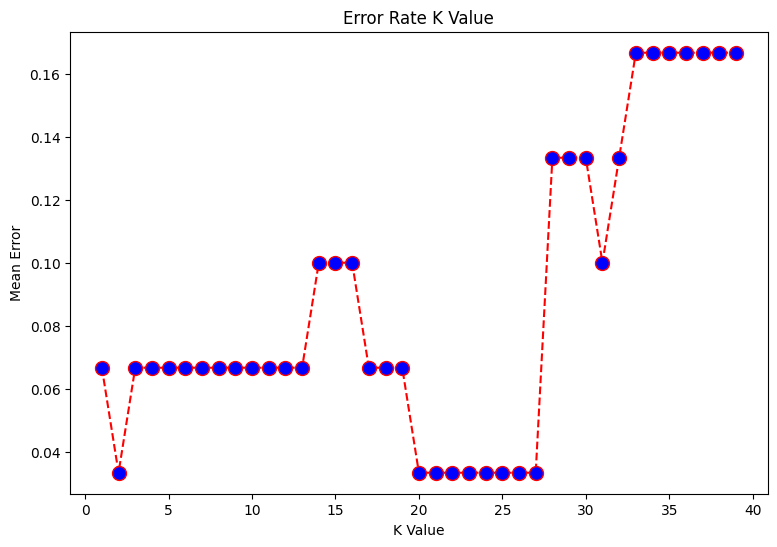

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

##2nd Round

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
y_pred.shape

(30,)

###Confusion Matrix

In [ ]:
#Evaluating the algorithm
print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


Confusion matrix, without normalization


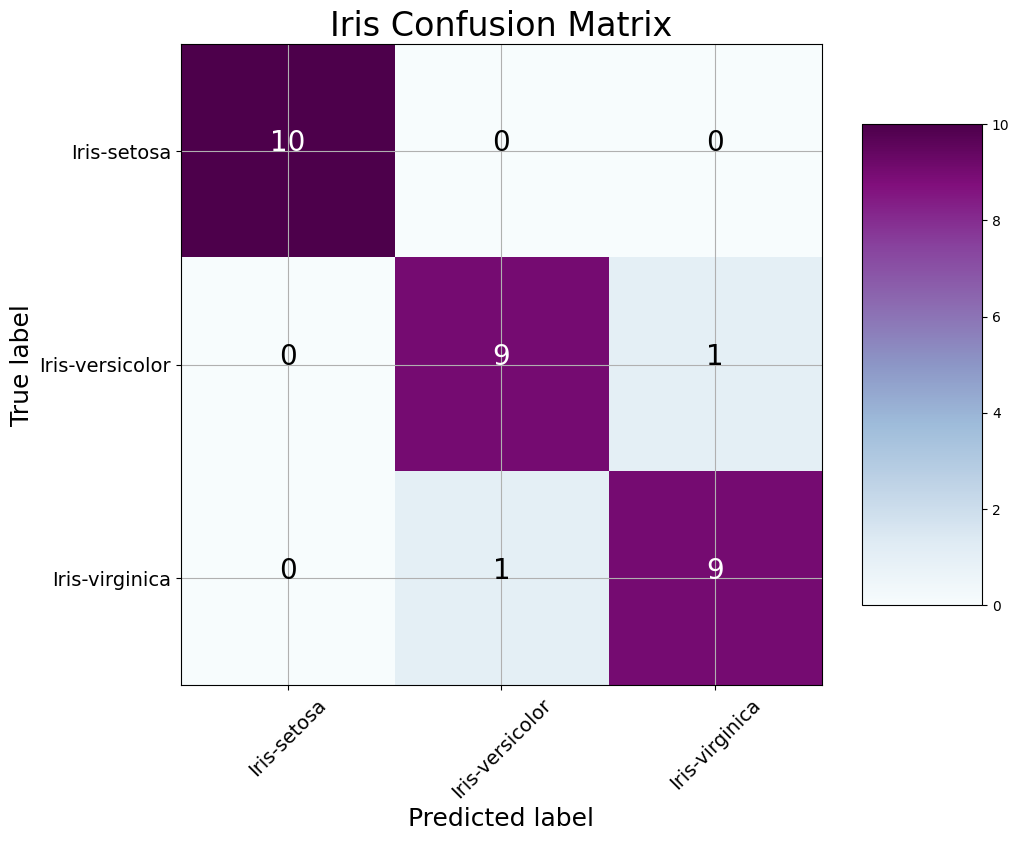

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Oranges):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        #print(cm)
        # Plot the confusion matrix
        plt.figure(figsize = (10, 10))
        plt.imshow(cm, interpolation='nearest', cmap="BuPu")
        plt.title(title, size = 24)
        plt.colorbar(aspect=4)
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45, size = 14)
        plt.yticks(tick_marks, classes, size = 14)
        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        # Labeling the plot
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                      horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

        plt.grid(None)
        plt.tight_layout()
        plt.ylabel('True label', size = 18)
        plt.xlabel('Predicted label', size = 18)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],

title = 'Iris Confusion Matrix')

#plt.savefig('cm.png')

###Calculating Error

In [ ]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

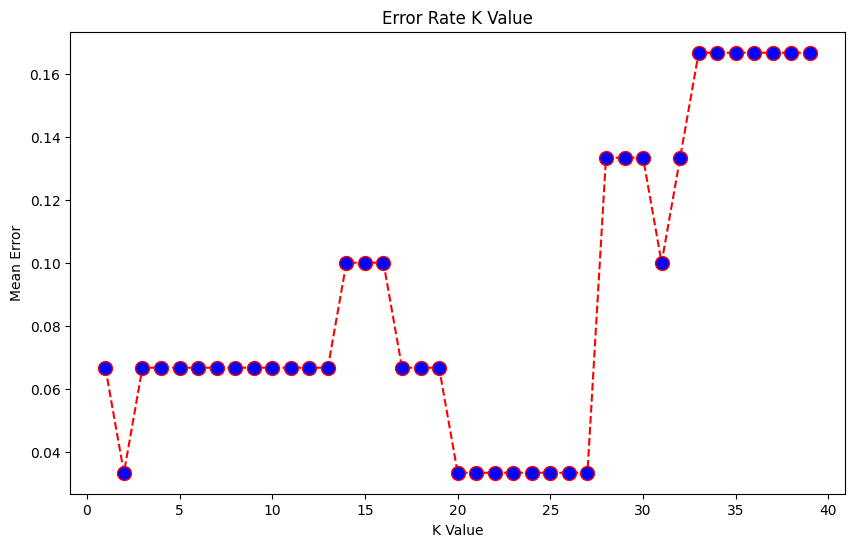

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')